# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [48]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [49]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [50]:
X = data.iloc[:,:-1]
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [51]:
y = data['Class'].values
y

array([0, 0, 0, ..., 0, 0, 0])

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 200) 

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
y_pred_proba = log_reg.predict_proba(X_test)
y_pred_proba

array([[5.62084490e-07, 9.99999438e-01],
       [9.99771974e-01, 2.28025738e-04],
       [9.99026110e-01, 9.73890282e-04],
       ...,
       [9.97786465e-01, 2.21353514e-03],
       [9.99891747e-01, 1.08253055e-04],
       [9.99825107e-01, 1.74892557e-04]])

In [12]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_log_reg

array([9.99999438e-01, 2.28025738e-04, 9.73890282e-04, ...,
       2.21353514e-03, 1.08253055e-04, 1.74892557e-04])

In [13]:
#Const
from collections import Counter
Counter(y_train)

Counter({0: 199008, 1: 356})

In [14]:
y_pred_const = np.zeros(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # выберем K=5 например
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_knn[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
#metrics
def accuracy(y_real, y_pred):
    return np.where(y_pred == y_real)[0].shape[0] / y_real.shape[0]

def precision(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_pred == 1)[0].shape[0]

def recall(y_real, y_pred):
    return np.where((y_pred == 1) & (y_real == 1))[0].shape[0] / np.where(y_real == 1)[0].shape[0]

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [54]:

cv_error = +np.average(cross_val_score(LogisticRegression(max_iter=400 ), X, y, cv=5, scoring='precision'))
cv_error

/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7445815057090296

In [18]:
#log_res

print('accuracy', accuracy(y_test, y_pred_log_reg))
print('precision', precision(y_test, y_pred_log_reg))
print('recall', recall(y_test, y_pred_log_reg))
print('f1', f1_score(y_test, y_pred_log_reg))


accuracy 0.9991573329588147
precision 0.8137254901960784
recall 0.6102941176470589
f1 0.6974789915966387


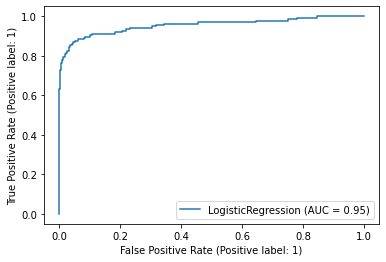

In [19]:
from sklearn import metrics
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()   

In [20]:
#const
print('accuracy', accuracy(y_test, y_pred_const))
print('precision', precision_score(y_test, y_pred_const))
print('recall', recall_score(y_test, y_pred_const))
print('f1', f1_score(y_test, y_pred_const))



accuracy 0.9984082955888721
precision 0.0
recall 0.0
f1 0.0


/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


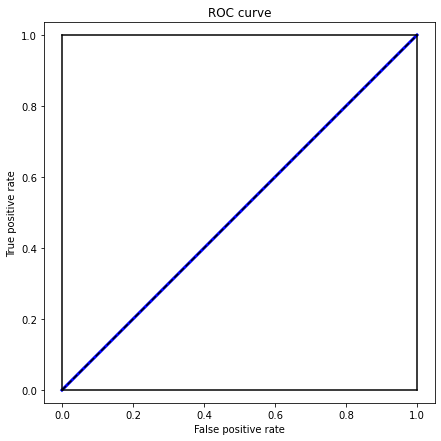

In [21]:
# metrics.plot(roc_curve(y_test, y_pred_proba_const))  
# plt.show()
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_const)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

In [56]:
#knn
print('accuracy', accuracy(y_test, y_pred_knn))
print('precision', precision_score(y_test, y_pred_knn))
print('recall', recall_score(y_test, y_pred_knn))
print('f1', f1_score(y_test, y_pred_knn))



accuracy 0.9984785178423042
precision 1.0
recall 0.04411764705882353
f1 0.08450704225352113


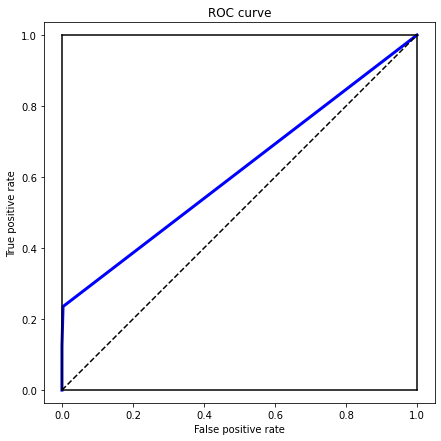

In [57]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Если мы хотим, чтобы робот банил только мошенников, то лучше всего подойдет точность, так как, если мы будем банить еще и обычных польхователей, то это не будет хорошо. С другой стороны, если нам важно банить всех мошенников, иногда загребая обчных пользователей, то можно максимизировать полноту, но на мой взгляд лучше не добанить мошенников, чем забанить почти всех мошенников, вместе с обыными пользователями

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [23]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [48]:
#log_res
log_reg = LogisticRegression( C = 0.1, solver = 'liblinear',intercept_scaling=2 )
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


In [49]:
print('accuracy', accuracy(y_test, y_pred))
print('precision', precision(y_test, y_pred))
print('recall', recall(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

accuracy 0.9992158515033414
precision 0.8556701030927835
recall 0.6102941176470589
f1 0.7124463519313304


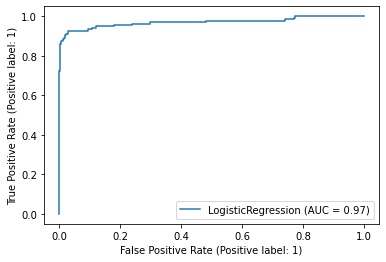

In [29]:
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()   

In [30]:
#new data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = log_reg.predict(X_test)

In [31]:
print('accuracy', accuracy(y_test, y_pred))
print('precision', precision(y_test, y_pred))
print('recall', recall(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))

accuracy 0.9992158515033414
precision 0.8556701030927835
recall 0.6102941176470589
f1 0.7124463519313304


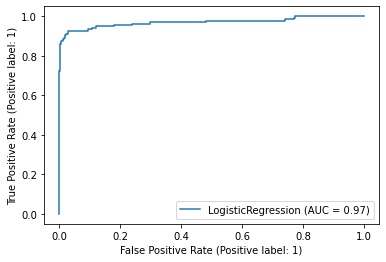

In [32]:
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()   

best c 0.7000000000000001
0.8175851048677135


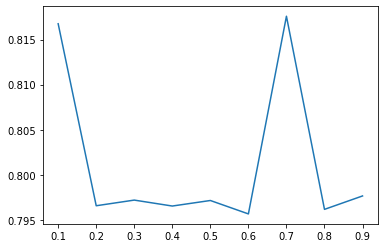

In [38]:
#tuning C
from sklearn.model_selection import cross_val_score
c = np.arange(0.1, 1, 0.1)
c_errors = []
miner = 0
bC = 1
for val in c:
    best_reg = LogisticRegression( C = val, solver = 'liblinear',intercept_scaling=2 )
    cv_error = +np.average(cross_val_score(best_reg, X, y, cv=5, scoring='precision'))
    c_errors.append(cv_error)
    if miner < cv_error:
        miner = cv_error
        bC = val
plt.plot(c, c_errors)
print('best c', bC)
print(miner)

best Scr 4.0
0.896384427906167


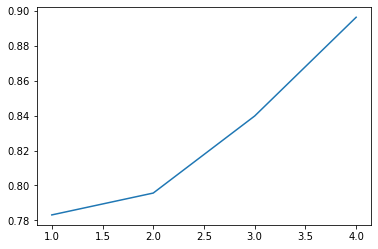

In [39]:
#tunning scaling
from sklearn.model_selection import cross_val_score
scr = np.arange(1, 5.0, 1)
scr_errors = []
miner = 0
bC = 1
for val in scr:
    best_reg = LogisticRegression( C = 0.7, solver = 'liblinear',intercept_scaling=val )
    cv_error = +np.average(cross_val_score(best_reg, X, y, cv=5, scoring='precision'))
    scr_errors.append(cv_error)
    if miner < cv_error:
        miner = cv_error
        bScr = val
plt.plot(scr, scr_errors)
print('best Scr', bScr)
print(miner)

In [43]:
#check with new params train_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log = LogisticRegression( C = 0.7, solver = 'liblinear',intercept_scaling=4 )
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

In [44]:
from sklearn.metrics import log_loss
print('accuracy', accuracy(y_test, y_pred))
print('precision', precision(y_test, y_pred))
print('recall', recall(y_test, y_pred))
print('f1', f1_score(y_test, y_pred))
print('log_loss', log_loss(y_test, y_pred))

accuracy 0.9991222218320986
precision 0.8505747126436781
recall 0.5441176470588235
f1 0.663677130044843
log_loss 0.030317505522804426


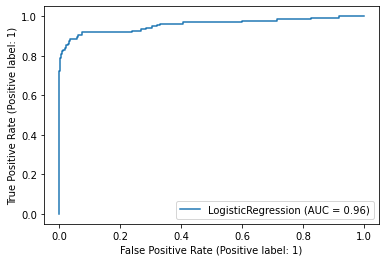

In [45]:
metrics.plot_roc_curve(log, X_test, y_test)  
plt.show()  

In [47]:
#test on cross val
cv_error = +np.average(cross_val_score(LogisticRegression( C = 0.7, solver = 'liblinear',intercept_scaling=4 ), X, y, cv=5, scoring='precision'))
cv_error

0.896384427906167

In [56]:
#GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
scr = np.arange(1, 5.0, 1)


grid = dict(solver=solvers,penalty=penalty,C=c_values,intercept_scaling = scr )
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision',error_score=0)
grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.882632 using {'C': 1.0, 'intercept_scaling': 4.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.769223 (0.060160) with: {'C': 100, 'intercept_scaling': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.858498 (0.030672) with: {'C': 100, 'intercept_scaling': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873382 (0.034421) with: {'C': 100, 'intercept_scaling': 3.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.879622 (0.031070) with: {'C': 100, 'intercept_scaling': 4.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.770196 (0.060368) with: {'C': 10, 'intercept_scaling': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.858498 (0.030672) with: {'C': 10, 'intercept_scaling': 2.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.873382 (0.034421) with: {'C': 10, 'intercept_scaling': 3.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.880859 (0.029952) with: {'C': 10, 'intercept_scaling': 4.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.771805 (0.062830) with: {'C': 1.0, 'intercept_scaling': 1.0, 'penalty': 'l2', 's

In [58]:
cv_error = +np.average(cross_val_score(LogisticRegression( C = grid_result.best_params_['C'], solver = 'liblinear',intercept_scaling=grid_result.best_params_['intercept_scaling'] ), X, y, cv=5, scoring='precision'))
cv_error

0.8193544535232515

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

In [58]:
import scipy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
data = pd.read_csv('ph-data.csv')
data

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [60]:
from collections import Counter
y = data['label']
Counter(y)

Counter({0: 38,
         1: 44,
         2: 44,
         3: 44,
         4: 44,
         5: 44,
         6: 44,
         7: 44,
         8: 44,
         9: 44,
         10: 44,
         11: 44,
         12: 44,
         13: 43,
         14: 44})

In [169]:
X = data.iloc[:,:-1]
X

,blue,green,red
0,36,27,231
1,36,84,250
2,37,164,255
3,22,205,255
4,38,223,221
...,...,...,...
648,201,123,0
649,203,51,46
650,169,62,48
651,173,37,79


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [64]:
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([ 1,  5,  3, 11,  0, 10,  9,  7, 11, 14,  9,  2,  9,  9,  1,  4, 14,
        5, 13, 10,  4,  5,  3,  4, 12,  3, 10,  2, 10,  2,  1, 13,  3,  1,
        7, 13, 14,  7,  6,  2,  3,  7,  5, 11,  7, 10, 14,  3,  4,  2, 10,
       11,  6,  9,  6,  3,  8, 12, 12,  0, 14,  7,  8, 10, 14,  7, 13, 11,
        0,  2,  4,  0,  6, 10,  5,  5,  7,  9,  1,  0,  7, 13,  5, 13,  3,
        8,  5, 14, 11, 10, 14, 14,  8,  2, 11,  7,  2, 11,  2,  8,  4,  5,
       14,  4, 10,  2,  2, 13, 14,  7, 14, 14,  3,  9, 10, 11,  9,  5,  5,
        0,  3,  8, 14,  3, 13, 11, 11,  4,  9, 10, 11])

In [65]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_log_reg[0]

array([1.74338235e-04, 2.80862566e-01, 2.20869179e-01, 2.22579069e-01,
       1.69086005e-01, 1.02158523e-01, 3.80859736e-03, 4.24345851e-04,
       1.71028476e-05, 6.44760288e-06, 9.57672651e-06, 4.86357535e-07,
       3.53165927e-06, 2.28785197e-07, 2.85167069e-09])

In [66]:
sum(y_pred_proba_log_reg[0])

1.0000000000000002

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([ 2,  4,  2, 12,  0, 10,  9,  6, 11, 14,  9,  1,  9,  9,  1,  3, 14,
        4, 13, 10,  3,  5,  4,  4, 12,  2, 10,  1, 10,  1,  0, 12,  2,  1,
        6, 13, 14,  6,  6,  2,  3,  6,  4, 12,  6, 10, 14,  3,  4,  2, 10,
       11,  5,  9,  5,  3,  8, 12, 12,  0, 14,  6,  8, 10, 14,  6, 13, 10,
        0,  1,  3,  0,  5, 10,  4,  3,  7,  9,  1,  0,  6, 13,  5, 13,  2,
        7,  5, 14, 11,  8, 14, 13,  7,  2, 11,  6,  2, 11,  2,  8,  2,  4,
       14,  3, 10,  1,  1, 13, 14,  7, 14, 14,  2,  9, 10, 12,  9,  5,  5,
        0,  2,  8, 14,  2, 14, 11, 11,  3,  9, 10, 11])

In [69]:
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [70]:
y_pred_const = np.ones(len(X_test)) 
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [71]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [72]:
print('LogReg')
print('accuracy', accuracy_score(y_test, y_pred_log_reg))
print('precision', precision_score(y_test, y_pred_log_reg, average='macro'))
print('recall', recall_score(y_test, y_pred_log_reg, average='macro'))
print('f1', f1_score(y_test, y_pred_log_reg, average='macro'))

LogReg
accuracy 0.5114503816793893
precision 0.5237662337662339
recall 0.5119347319347319
f1 0.49141268714683706


In [73]:
print("KNN")
print('accuracy', accuracy_score(y_test, y_pred_knn))
print('precision', precision_score(y_test, y_pred_knn, average='macro'))
print('recall', recall_score(y_test, y_pred_knn, average='macro'))
print('f1', f1_score(y_test, y_pred_knn, average='macro'))

KNN
accuracy 0.6946564885496184
precision 0.6858201058201059
recall 0.6907226107226107
f1 0.6715895071959147


In [76]:
print("Const")
print('accuracy', accuracy_score(y_test, y_pred_const))
print('precision', precision_score(y_test, y_pred_const, average='macro'))
print('recall', recall_score(y_test, y_pred_const, average='macro'))
print('f1', f1_score(y_test, y_pred_const, average='macro'))

Const
accuracy 0.07633587786259542
precision 0.005089058524173028
recall 0.06666666666666667
f1 0.009456264775413713


/home/pavel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

In [167]:
#Хочу максимизировать точность 

In [170]:
#Попробую добавить новые фичи вида произвыедения red-blue, red-green, blue-green
X['red-blue'] = X['blue']*X['red']
X['red-green'] = X['red']*X['green']
X['blue-green'] = X['blue']*X['green']
X

,blue,green,red,red-blue,red-green,blue-green
0,36,27,231,8316,6237,972
1,36,84,250,9000,21000,3024
2,37,164,255,9435,41820,6068
3,22,205,255,5610,52275,4510
4,38,223,221,8398,49283,8474
...,...,...,...,...,...,...
648,201,123,0,0,0,24723
649,203,51,46,9338,2346,10353
650,169,62,48,8112,2976,10478
651,173,37,79,13667,2923,6401


In [171]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X.shape

(653, 6)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
#Проверим что изменилось
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [174]:
y_pred_log_reg = log_reg.predict(X_test)

In [175]:
#Мало что изменилось
print('accuracy', accuracy_score(y_test, y_pred_log_reg))
print('precision', precision_score(y_test, y_pred_log_reg, average='macro'))
print('recall', recall_score(y_test, y_pred_log_reg, average='macro'))
print('f1', f1_score(y_test, y_pred_log_reg, average='macro'))

accuracy 0.5038167938931297
precision 0.5016450216450217
recall 0.5177816627816628
f1 0.476628254024135


In [176]:
X.shape

(653, 6)

In [177]:
y

0       0
1       1
2       2
3       3
4       4
       ..
648    10
649    11
650    12
651    13
652    14
Name: label, Length: 653, dtype: int64

In [178]:
from sklearn.metrics import make_scorer

In [179]:
#Попробуем старый и новый сеты перебрать на GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
model = LogisticRegression()

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(precision_score, average='macro'),error_score=0)
grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.666012 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.666012 (0.053933) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.662578 (0.052745) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.627728 (0.055596) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.646760 (0.049542) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.645115 (0.050856) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.623421 (0.057459) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.614255 (0.064144) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.614255 (0.064144) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.614255 (0.064144) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.614429 (0.073920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.614429 (0.073920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.614429 (0.073920) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.514033 (0.081313) with: {'C': 0.01, 'penalty'

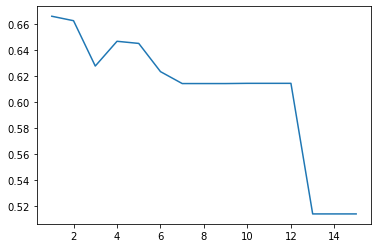

In [180]:
plt.plot(np.arange(1,16),means)

In [181]:
#Проверим на train_test_split
Bres = grid_result.best_params_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = LogisticRegression(C=Bres['C'], penalty = 'l2', solver = Bres['solver'], max_iter = 10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [182]:
y_pred_log_reg = log_reg.predict(X_test)

In [183]:
y_pred_log_reg = log_reg.predict(X_test)

In [184]:
print('precision', precision_score(y_test, y_pred_log_reg, average='macro'))

precision 0.5753435946121817


In [185]:
from sklearn.model_selection import cross_val_score
cv_error = +np.average(cross_val_score(LogisticRegression( C=Bres['C'], penalty = 'l2', solver = Bres['solver'],
                    max_iter = 10000), X, y, cv=5, scoring=make_scorer(precision_score, average='macro')))
cv_error

0.6460836755836754

In [186]:
#Все то же самое только на старых данных

In [187]:
data = pd.read_csv('ph-data.csv')

In [188]:
y = data['label']
X = data.iloc[:,:-1]

In [189]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
model = LogisticRegression()

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(precision_score, average='macro'),error_score=0)
grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.583628 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.580470 (0.071146) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.549713 (0.071645) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.550279 (0.071402) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.580470 (0.071146) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.548586 (0.071384) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.549723 (0.071118) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.580470 (0.071146) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.549699 (0.070470) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.550279 (0.071402) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.580973 (0.071297) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.550056 (0.072190) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.550279 (0.071402) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.583628 (0.068655) with: {'C': 0.01, 'penalty

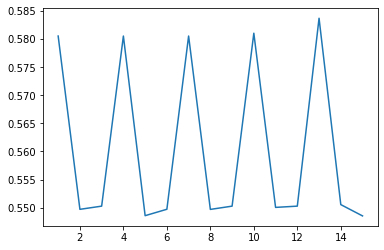

In [190]:
plt.plot(np.arange(1,16),means)

In [191]:
#А если отстандатизировать


In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X.shape

(653, 3)

In [193]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'sag']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
model = LogisticRegression()

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(precision_score, average='macro'),error_score=0)
grid_result = grid_search.fit(X, y)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.608855 using {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.581555 (0.070639) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.581555 (0.070639) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.581555 (0.070639) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.592484 (0.072112) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.592484 (0.072112) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.592484 (0.072112) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.605508 (0.077278) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.605026 (0.077495) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.605508 (0.077278) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}
0.607956 (0.080597) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.607956 (0.080597) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.608855 (0.079737) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.438923 (0.073664) with: {'C': 0.01, 'penalty': 'l2'

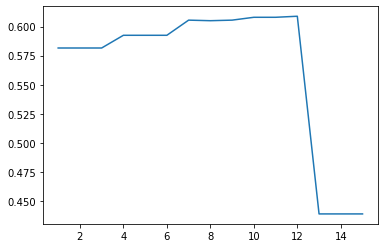

In [194]:
plt.plot(np.arange(1,16),means)

После проделанной работы можно сделать вывод, что модель с новыми фичами и стандартизацией, показывает лучшую точность, которую удалось повысить на 0.14. Итог precision 0.52 --> precision 0.66